# Сборный проект. Анализ видеоигр

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. (Данные за 2016 год могут быть неполными)  
  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков». 

### Описание данных
+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы долларов)
+ EU_sales — продажи в Европе (миллионы долларов)
+ JP_sales — продажи в Японии (миллионы долларов)
+ Other_sales — продажи в других странах (миллионы долларов)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План работы
[Шаг 1](#step1). Открытие файла и описание данных  
- [Вывод](#step1_conclusion)  
   
[Шаг 2](#step2). Подготовка данных  
   1. [Замена названий столбцов](#step2.1)
   2. [Преобразование данных в нужные типы](#step2.2)
   2. [Заполнение пропусков](#step2.3)
   2. [Подсчет суммарных продаж в регионах](#step2.4)  
   
- [Вывод](#step2_conclusion)  

[Шаг 3](#step3). Исследовательский анализ данных 
   1. [Сколько игр выпускалось в разные годы](#step3.1)
   2. [Как менялись продажи по платформам ](#step3.2)
   3. [Отберем данные за соответствующий актуальный период](#step3.3)
   4. [Выберем несколько потенциально прибыльных платформ](#step3.4)
   5. [Построим график по глобальным продажам каждой игры и разбивкой по платформам](#step3.5)
   6. [Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#step3.6)
   7. [Посмотрим на общее распределение игр по жанрам](#step3.7)
   
- [Вывод](#step3_conclusion)  

[Шаг 4](#step4). Портрет каждого региона  
   1. [Северная Америка](#step4_NA)  
   1. [Европа](#step4_EU)  
   1. [Япония](#step4_JP)  

- [Вывод](#step4_conclusion)

[Шаг 5](#step5). Проверка гипотез  
   1. [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#step5.1)
   2. [Средние пользовательские рейтинги жанров Action и Sports разные](#step5.2)  
  
- [Вывод](#step5_conclusion)  

[Шаг 6](#step6). Общий вывод  

<a name="step1"></a>
### Шаг 1. Открытие файла и описание данных

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
games = pd.read_csv('/datasets/games.csv')

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть пропуски в данных:
- Name, Genre - скорее ошибка системы (всего 2 пропуска среди 16715 игр, поэтому может избавиться от них)
- Year_of_Release - может быть насколько стара, что никто и не помнит когда она вышла (надо точно посмотреть по названиям)
- Critic_Score, User_Score, Rating - не во все играли, не все оценили (но заполнять пропуски придется)   
  
Типы данных неверные только у:
- Year_of_Release, Critic_Score - float вместо int (но это в силу того, что есть пустые значения)  
- User_Score - object вместо float (значит туда закрались не цифры, иначе при чтенииф файла pandas выбрал бы более легковесный числовой тип)

In [5]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Данные содержат пропуски, а также неправильные типы столбцов.  
Название игры - это всегда уникальное значение, платформ - ограниченное число категорий, года - сильно большие вариации (встречаются игры из прошлого века), жанры - ограниченное число категорий, числовые количественные столбцы с продажами в Америке, Европе, Японии и других регионах, а также оценки критиков и пользователей. Рейтинг возрастной категории - это не 18+, а буковки!  

Посмотрим на диапазон значений для числовых столбцов

In [6]:
numeric_columns = ['Year_of_Release'] + list(games.columns[4:8])

games[numeric_columns].describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342
std,5.877050,0.813604,0.503339,0.308853,0.186731
min,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000
max,2016.000000,41.360000,28.960000,10.220000,10.570000


- Годы - имеют адекватные значения (с 1980 по 2016)  
- Продажи имеют нулевые значения - либо игру не продавали в регионе, либо кто-то забыл данные
- Оценки критиков тоже попали в диапазон ожидаемых значений (от 13 до 98 очков)
- Оценки пользователей никак не отобразились в силу неправильного типа данных (object вместо int или хотя бы float)

Посмотрим, что у нас в неверном типе данных User_Score

In [7]:
games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Вот оно - 'tbd' (To Be Determined) - помешало сделать весь столбец типа float. Это значит, что на данный момент оценка пользователя неизвестна, но будет определена. Такие значения можно заменить на NaN

<a name="step1_conclusion"></a>
### Вывод

**Типы данных**  
Неверные только у Year_of_Release, Critic_Score и User_Score. Необходимо преобразование:
- Year_of_Release (float -> int)
- Critic_Score (float -> int)
- User_Score (object -> float)

**Пропуски в данных**  
- Name, Genre - скорее ошибка системы (всего 2 пропуска среди 16715 игр, поэтому может избавиться от них)
- Year_of_Release - может быть насколько стара, что никто и не помнит когда она вышла (надо точно посмотреть по названиям)
- Critic_Score, User_Score, Rating - не во все играли, не все оценили (но заполнять пропуски придется) 
- NA_sales, EU_sales, JP_sales, Other_sales - есть нулевые значения
- User_Score содержит пропуски данных в виде сюрприза, а именно, строки 'tbd' (To Be Determined)

<a name="step2"></a>
### Шаг 2. Подготовка данных

<a name="step2.1"></a>
**Замена названий столбцов**

Приведем названия столбцов к нижнему регистру

In [8]:
games = games.rename(str.lower, axis='columns')

# проверка
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a name="step2.3"></a>
**Заполнение пропусков**

- name, genre - скорее ошибка системы (всего 2 пропуска среди 16715). Восстановить невозможно, поэтому мы избавимся от них

In [9]:
games = games.query('name.notnull() and genre.notnull()')

# проверка
len(games.query('name.isnull()or genre.isnull()'))

0

- year_of_release - 269 cтрок, есть игры у которых в названии есть год, остальные по названию яндексятся и год выпуска у них указан, можно расспарсить эти года из поиска.

In [10]:
games.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
# библиотеки для парсинга

import requests
from bs4 import BeautifulSoup
import re
import ssl

In [12]:
ssl._create_default_https_context = ssl._create_unverified_context # для соблюдения правил протокола https
headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 YaBrowser/20.2.0.1145 Yowser/2.5 Safari/537.36'
      } # для эмулирования человеческой деятельности

base_url = 'https://en.wikipedia.org/wiki/'

for i, row in games.query('year_of_release.isnull()').iterrows():
    # сначала проверяем, есть ли год в названии игры
    game_name = row['name']
    find_year = re.search('\d{4}', game_name)
    if find_year:
        year = find_year.group(0)
    # иначе ищем в википедии и достаем оттуда год (в яндексе пробовала, но там вылезает капча)
    else:
        year = None
        
        url = base_url + game_name.replace(' ', '_')
        r = requests.get(url, headers=headers)
        soup = BeautifulSoup(r.text)
        
        th = soup.find(lambda tag: tag.name=='th' and ('Release' in tag.text))
        if th: # если нашелся тег
            match = re.search('[12]\d{3}', str(th.parent))
            if match: # если найден такой тег 
                year = match.group()
    
    # присваиваем игре год
    games.loc[i, 'year_of_release'] = year

In [13]:
# проверка какие игры остались
games.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,None,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
805,Rock Band,Wii,None,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,None,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1506,Adventure,2600,None,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,None,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16080,Ferrari: The Race Experience,Wii,None,Racing,0.00,0.01,0.00,0.00,54.0,NaN,E
16288,Shorts,DS,None,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16293,AKB1/48: Idol to Guam de Koishitara...,X360,None,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,None,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M


Осталось 88 пропущенных значений: некоторые игры - это серии, выпускающиеся несколько лет (год выхода определить невозможно, некоторые игры были отменены, а у некоторых нет страницы на Википедии.  
Ну что ж, вполне неплохой результат по заполнению - 91 из 269 остались пустыми. Мы сделали все возможное, идем дальше

- critic_score, user_score, rating - не во все играли, не все оценили (но заполнять пропуски придется)  

Также user_score содержит пропуски данных в виде сюрприза, а именно, строки 'tbd' (To Be Determined)
Посмотрим, влияют ли жанр и платформа на оценку критика и пользователя

In [14]:
# заполним 'tbd' None, так как оценки нет и такие строки надо заполнять

games.loc[games['user_score'] == 'tbd', 'user_score'] = None
games['user_score'] = games['user_score'].astype('float')

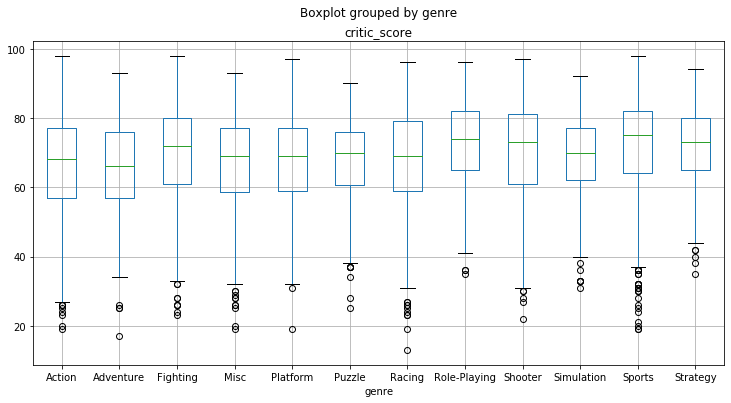

In [15]:
games.boxplot('critic_score', by='genre', figsize=(12,6))

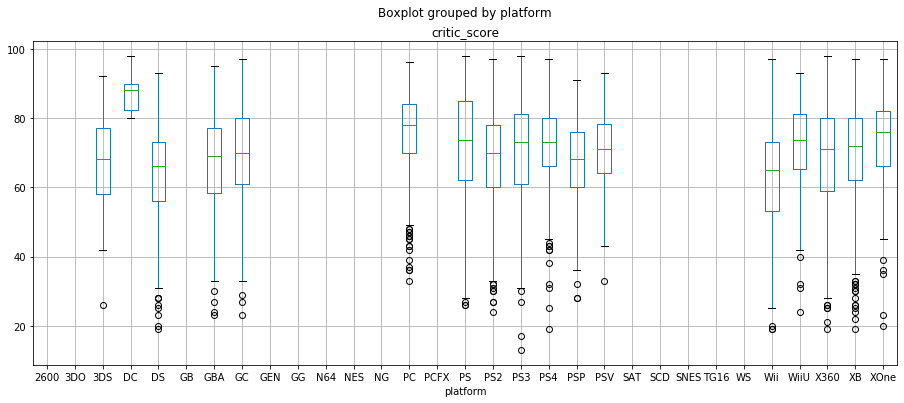

In [16]:
games.boxplot('critic_score', by='platform', figsize=(15,6))

По рейтингам критиков такая зависимость есть - от платформы и от жанра игры  
Посмотрим на рейтинги пользователей

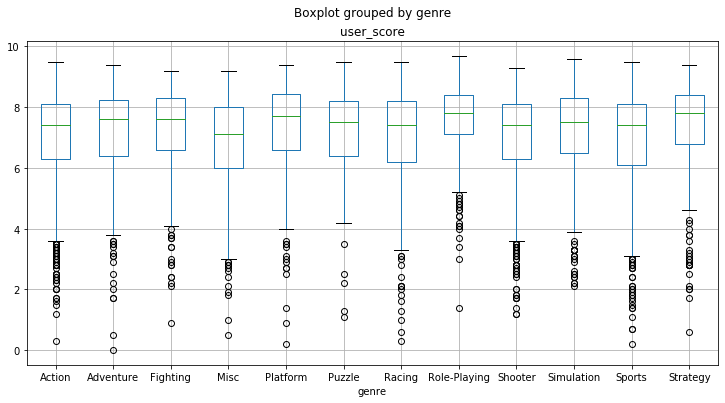

In [17]:
games.boxplot('user_score', by='genre', figsize=(12,6))

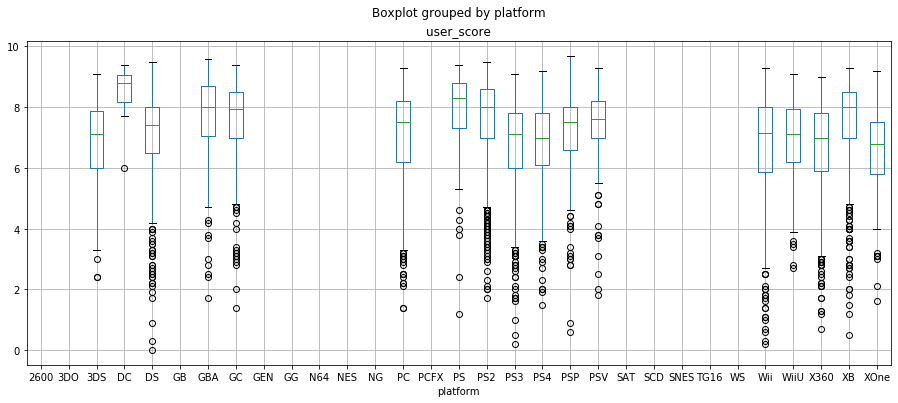

In [18]:
games.boxplot('user_score', by='platform', figsize=(15,6))

По рейтингам пользователей аналогичная зависимость есть - от платформы и от жанра игры  
Заполним пропуски медианными значениями (не средними, так как среднее будет чувствительно к выбросам)

In [19]:
def median_with_factors(platform, genre, df=games):
    '''
    Функция возвращающая медианные значения датафрейма
    с текущим жанром и платформой игры
    '''
    filter_query = 'platform == @platform or genre == @genre'
    
    # медианное значение
    median = df.query(filter_query).median()
    return median

In [20]:
for col in ['user_score', 'critic_score']:
    print('Было пустых значений {} = {}'.format(col, len(games.query(col+'.isnull()'))))
    for platform in games['platform'].unique():
        for genre in games['genre'].unique():
            try:
                games.loc[games.query(col+'.isnull() and platform==@platform and genre==@genre')
                          , col] = median_with_factors(platform, genre)[col]
            except: # может не оказаться таких строк с платформой и жанром
                pass
    print('Стало пустых значений {} = {}'.format(col, len(games.query(col+'.isnull()'))))

Было пустых значений user_score = 9123
Стало пустых значений user_score = 9123
Было пустых значений critic_score = 8576
Стало пустых значений critic_score = 8576


Посмотрим на рейтинг ESRB.

In [21]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Есть старый рейтинг 'K-A' - сейчас это рейтинг называется 'E'  

Также есть рейтинг 'RP' - то есть продукт был отправлен в ESRB и ожидает присвоения рейтинга. Такой рейтинг используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу. Поэтому такие игры, скорее вспего, не вышли в свет.

Если пустое значение - значит, разработчики решили выпускать игру без рейтинга. Поэтому пропуски не будем заполнять, чтобы в дальнейшем понять, какие игры и в каких регионах хоят рейтинговать и не хотят.

- na_sales, eu_sales, jp_sales, other_sales - есть нулевые значения. Оставим их такими, так как, скорее всего, игры не продавали в данном регионе. Их могли попробовать продать в Америке, но потом продажи провалились, и их не повезли в дургие страны из-за этого.

<a name="step2.2"></a>
**Преобразование данных в нужные типы**

Сделаем следующее преобразование
- year_of_release (float -> int) потому что год всегда целый, но пока есть пропуски год - это float
- critic_score (float -> int) оценки критиков от 0 до 100 и всегда целые для такой большой шкалы, но пока есть пропуски оценка критика - это float
- user_score (object -> float) очки - это не строка, а обязательно число и иногда дробное

In [22]:
columns_change_type = ['year_of_release', 'critic_score', 'user_score']
for col in columns_change_type:
    games[col] = pd.to_numeric(games[col])

# проверка
games[columns_change_type].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 3 columns):
year_of_release    16622 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
dtypes: float64(3)
memory usage: 1.1 MB


Так как в данных еще содержатся пропуски, то все столбцы приведены к типу float

<a name="step2.4"></a>
**Подсчет суммарных продаж в регионах**

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [23]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# проверка
games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales']].head()

,na_sales,eu_sales,jp_sales,other_sales,all_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38


<a name="step2_conclusion"></a>
### Вывод

1. Названия столбцов приведены к нижнему регистру
2. Заполнены некоторые из пропусков:
   - name, genre - скорее ошибка системы (всего 2 пропуска среди 16715). Восстановить невозможно, поэтому мы избавились от них
   - year_of_release - если год стоял в названии, то взяла оттуда, остальное - спарсила данные из интернета. Итого: 269 пропусков -> 91 пропусков
   - critic_score, user_score - есть зависимоть от жанра и платформы игры, поэтому заполнила медианными значениями по соответствующим факторам
   - rating (ESRB) - пустое значение значит, что разработчики решили выпускать игру без рейтинга. Поэтому пропуски не заполняла, чтобы в дальнейшем понять, какие игры и в каких регионах хоят рейтинговать и не хотят.
   - na_sales, eu_sales, jp_sales, other_sales - есть нулевые значения. Оставим их такими, так как, скорее всего, игры не продавали в данном регионе. Их могли попробовать продать в Америке, но потом продажи провалились, и их не повезли в другие страны из-за этого.  
3. Преобразование типов:
   - user_score (object -> float)  
   Остальное осталось без преобразования, так как пустые значения все еще присутствовали в столбцах  
4. Подсчитали суммарные продажи в регионах (Америка + Европа + Япония + остальные)

<a name="step3"></a>
### Шаг 3. Исследовательнский анализ данных

<a name="step3.1"></a>
- Посмотрим, сколько игр выпускалось в разные годы  

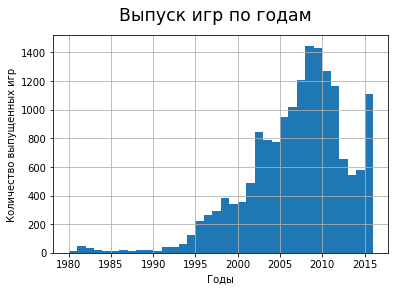

In [28]:
plt.suptitle('Выпуск игр по годам', ha='center', fontsize='xx-large')
plt.xlabel('Годы')
plt.ylabel('Количество выпущенных игр')
games['year_of_release'].hist(bins=36, range=(1980, 2016))

Наблюдаются пики в 2008-2009 годах и в 2016. В первом случае, мог повлиять на такую популярность кризис - многие решили справляться со стрессом играя в приставки + разработчики уже нащупали, что нравится пользователям и чего они хотят.  

Увеличение продаж в 2016 году можно объяснить наращиваем технологической составляющей - качесвто графики и возмодностей игр возросло.

<a name="step3.2"></a>
- Посмотрим, как менялись продажи по платформам   

In [30]:
# отберем 10 самых популярных платформ по продажам игр
top_15_platforms = (
    games.pivot_table(index='platform',
                      values='all_sales', 
                      aggfunc='sum').sort_values('all_sales', ascending=False)[:15]
).index

Чтобы не лепить все 15 платформ на одном графике, разобьем их на **три части** - на первом графике покажем распределение суммарных продаж для 1-5 платформы в списке, на втором графике - для 6-10 платформы, а на третье графике - для 11-15 платформы.

In [31]:
top_1_5_platforms = top_15_platforms[:5]
top_1_5_distribution = (
    games.query('platform.isin(@top_1_5_platforms)').pivot_table(
        index=['year_of_release', 'platform'],
        values='all_sales', 
        aggfunc='sum')
)

top_1_5_distribution.head()

all_sales
year_of_release platform           
1985.0          DS             0.02
1988.0          DS             0.09
                PS3            0.17
1989.0          DS             0.02
2000.0          PS2           39.17

TypeError: 'Text' object is not callable

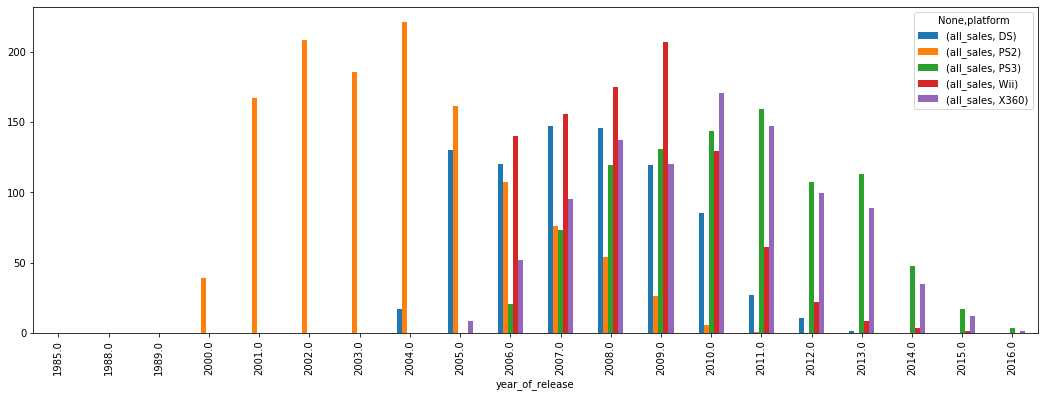

In [66]:
# .unstack() - для того, чтобы платформы находились не в индексах, а в столбцах
top_1_5_distribution.unstack(1).plot(kind='bar', figsize=(18,6))

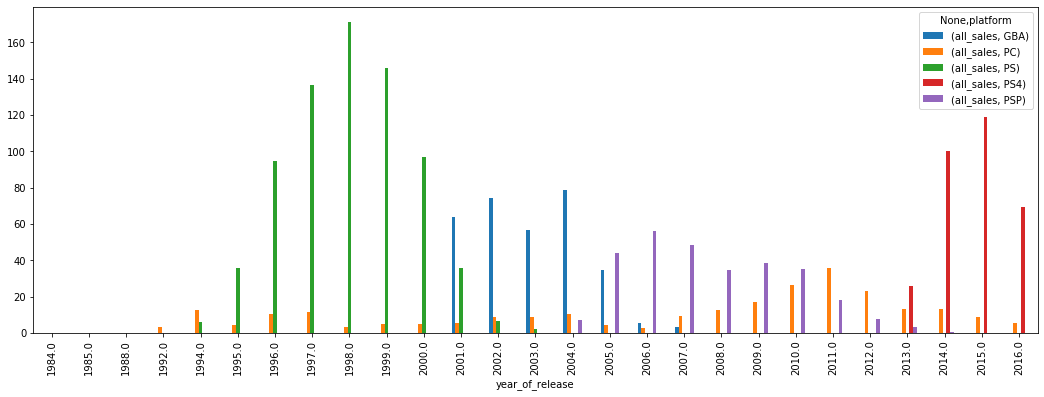

In [33]:
top_6_10_platforms = top_15_platforms[5:10]
top_6_10_distribution = (
    games.query('platform.isin(@top_6_10_platforms)').pivot_table(
        index=['year_of_release', 'platform'],
        values='all_sales', 
        aggfunc='sum')
)

# .unstack() - для того, чтобы платформы находились не в индексах, а в столбцах
top_6_10_distribution.unstack(1).plot(kind='bar', figsize=(18,6))

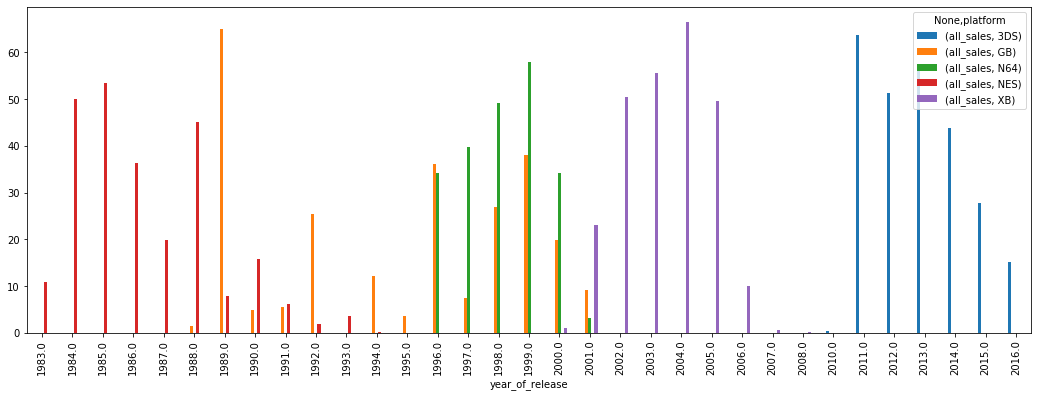

In [34]:
top_11_15_platforms = top_15_platforms[10:]
top_11_15_distribution = (
    games.query('platform.isin(@top_11_15_platforms)').pivot_table(
        index=['year_of_release', 'platform'],
        values='all_sales', 
        aggfunc='sum')
)

top_11_15_distribution.unstack(1).plot(kind='bar', figsize=(18,6))

PC игры вечны всегда - персональный компьютер не только для игр, поэтому им пользуются вечно. Вот и игры выпускают для него с 1992 года по текущий в выборке 2016 год.  

Для остальных игр наблюдается тенденция в 2004 выпустили в 2013 закончили выпускать, в 2000 выпустили в 2010 закончили. По 10 лет держится платформа, затем появялется новая популярная.  

А вот PS4 вышла в 2013 году, пожтому игры на нее еще будут выпускать. При этом, PS3 накладывается на PS4 (потому что у одних еще отсается старая приставка, а для продвинутых тоже надо игры делать). То же сейчас наблюдается и с PS5 - скоро ее выпустят, и продажи будут нахлестываться на продажи игр для PS4.  

Для GB (GameBoy) наблюдается самая продолжительная популярность, причем скачкообразная, с 1988 по 2001 год. Может быть новое - это хорошо забытое старое?

<a name="step3.3"></a>
- Отберем данные за соответствующий актуальный период   

Возьмем данные с 2008 года, чтобы захватить снижение продаж в индустрии видеоигр и повышение, чтобы понять как увеличить пик и в 2017 году.  

И также возьмем данные по 20 лучшим платформам по продажам (в 15 могут не попасть зарождающиеся звезды)

In [35]:
top_20_platforms = (
    games.pivot_table(index='platform',
                      values='all_sales', 
                      aggfunc='sum').sort_values('all_sales', ascending=False)[:20]
).index
actual_games = games.query('platform.isin(@top_20_platforms) and year_of_release >= 2008')

print('Было данных =', len(games))
print('Отобрано данных =', len(actual_games))

Было данных = 16713
Отобрано данных = 7776


<a name="step3.4"></a>
- Выберем несколько потенциально прибыльных платформ  

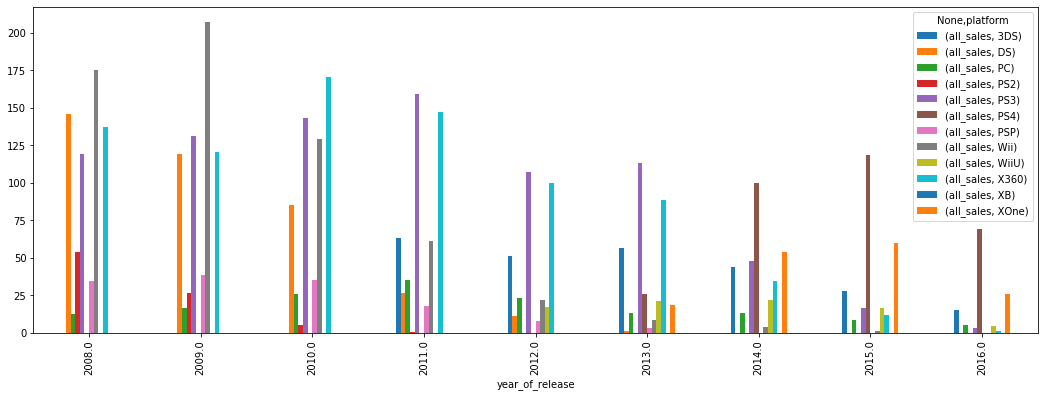

In [36]:
(actual_games.pivot_table(
    index=['year_of_release', 'platform'],
    values='all_sales', 
    aggfunc='sum')
 .unstack(1)
 .plot(kind='bar', figsize=(18,6))
)

РС - пользуется до сих пор популярностью - это безотказный вариант, но продаж там будет не больше всех. Можно эту платформу оставить как задел на будущее.  

Растут по продажам - PS4  
Не растут и не падают - 3DS, XOne, PC  
Падают по продажам - PS3, DS, Wii, X360, WiiU  
Давно упали - PS2, PSP  

Самая востребованная сейчас на рынке - PS4. Также ресурсы позволяют сделать игру и для PS3. Еще безотказный вариант -  для 3DS, XOne - в среднем могут принести неплохой доход.

<a name="step3.5"></a>
- Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.  

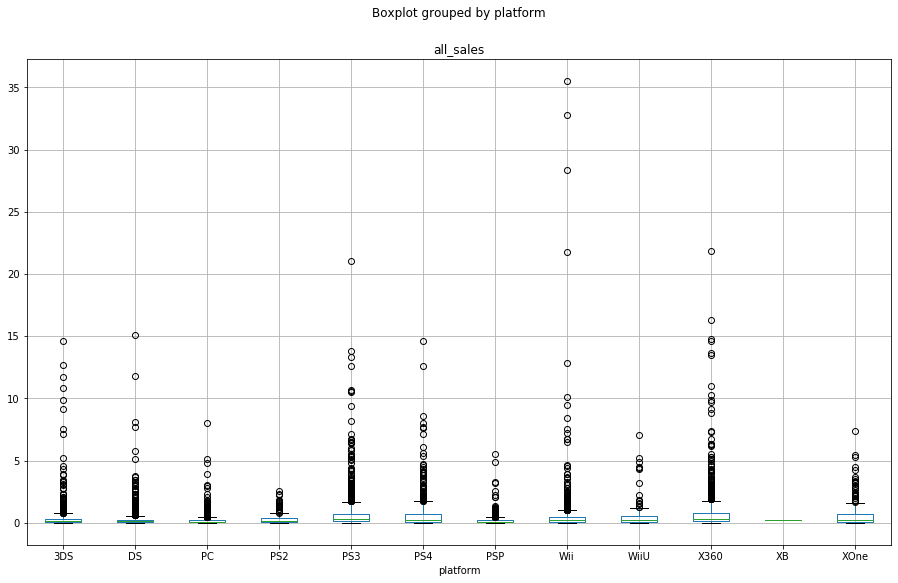

In [38]:
actual_games.boxplot('all_sales', by='platform', figsize=(15,9))

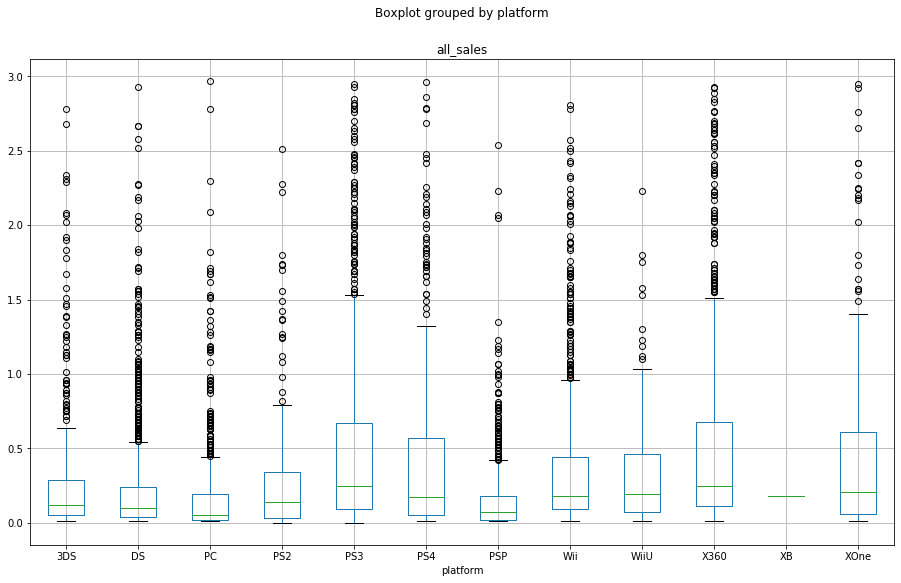

In [37]:
# посмотрим подробнее на средние, поэтому возьмем участок до 3
actual_games.query('all_sales < 3').boxplot('all_sales', by='platform', figsize=(15,9))

Разница есть между платформами и существенная - и по средним и по максимальным .  
Распределения сдвинуты в положительную сторону - это хорошо для нас - с бОльшей вероятностью продажи будут выше среднего чем ниже.  

Wii - платформа, которая пользовалась самой большой популярностью. Потом вышла новая WiiU, которая была всем знакома по своему родителю. Поэтому она (WiiU) имеет распределение выше, чем у Wii. Но по гистограмме видно, что они и сдулись достаточно быстро, и игры на них не имени максимумов выше, чем у Wii. 

<a name="step3.6"></a>
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков  

In [39]:
# выделим список перспективных для нас платформ
potential_platforms = ['PS4', 'PS3', 'PC', '3DS', 'XOne']

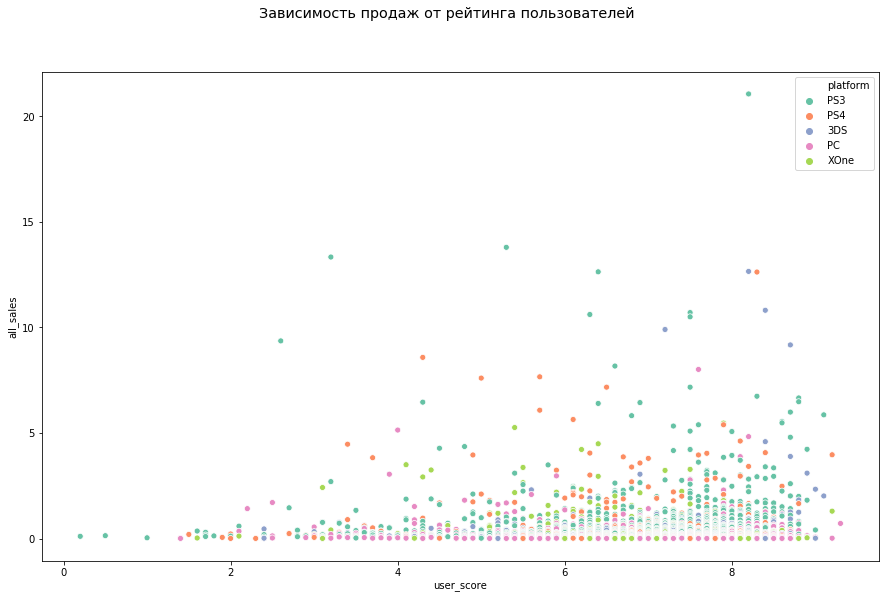

In [68]:
# график распределения по пользователям
fig = plt.gcf()
fig.set_size_inches(15, 9)
plt.suptitle('Зависимость продаж от рейтинга пользователей', ha='center', fontsize='x-large')
sns.scatterplot(data=actual_games.query('platform.isin(@potential_platforms)'), 
                x='user_score', y='all_sales', hue='platform', palette='Set2')

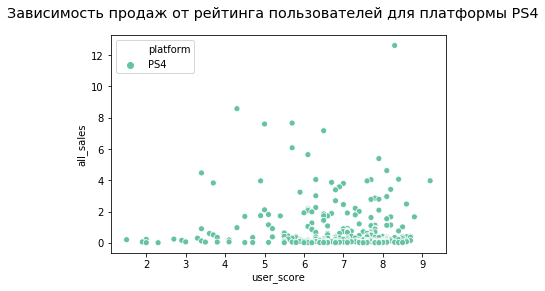

In [70]:
# распределение для одной из платформ
plt.suptitle('Зависимость продаж от рейтинга пользователей для платформы PS4', ha='center', fontsize='x-large')
sns.scatterplot(data=actual_games.query('platform == "PS4"'), 
                x='user_score', y='all_sales', hue='platform', palette='Set2')

Распределение в рамках одной платформы не говорит, что у нас есть линейная зависимость - слишком большой разброс

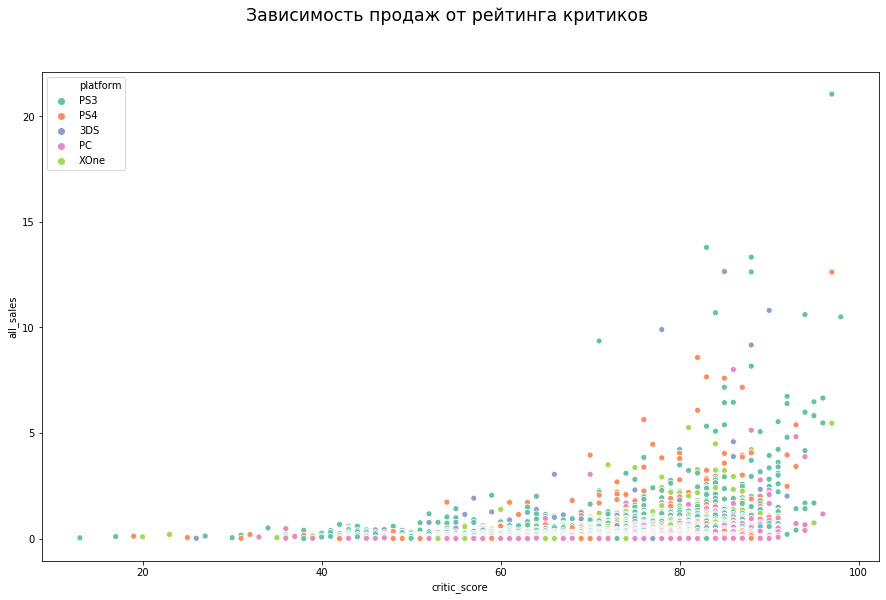

In [71]:
# график распределения по критикам
fig = plt.gcf()
fig.set_size_inches(15, 9)

plt.suptitle('Зависимость продаж от рейтинга критиков', ha='center', fontsize='xx-large')
sns.scatterplot(data=actual_games.query('platform.isin(@potential_platforms)'), 
                x='critic_score', y='all_sales', hue='platform', palette='Set2')

По графикам сложно делать вывод о корреляции - для многих платформ не имеет значение, какую оценку поставил пользователь или критик.  

Точнее высокая оценка критика или пользователя не гарантирует больших прибылей - вы можете быть внизу графика и также вверху. Но низкая оценка критика или пользователей - говорит о том, что будут и низкие продажи. 

Также для оценок критиков боле 90 баллов - продажи больше 1 млн дол точно обеспечены! (Скорее всего, большинство игроков при выборе игры руководствуются оценкой критика больше 90 (также как и на букинге путешественники выбирают отели в высоким рейтингом).

Вывод такой, что оценка критика больше влияет, чем оценка пользователя на покупку

---
Давайте посмотрим на цифры, то есть на коэффициент корреляции Пирсона.

In [43]:
for col in ['critic_score', 'user_score']:
    print('Корреляция {} и {}'.format(col, 'all_sales'))
    print('Общая корреляция =', actual_games[col].corr(actual_games['all_sales']))
    print('Корреляция по платформам')
    # группировка по платформам с аггрегацией в виде коэффициента корреляции
    print(actual_games.groupby('platform').agg(lambda x: x[col].corr(x['all_sales']))['all_sales'])
    print()

Корреляция critic_score и all_sales
Общая корреляция = 0.29778335167175807
Корреляция по платформам
platform
3DS     0.348216
DS      0.306337
PC      0.297132
PS2     0.344831
PS3     0.433434
PS4     0.406568
PSP     0.339539
Wii     0.224661
WiiU    0.348380
X360    0.388909
XB           NaN
XOne    0.416998
Name: all_sales, dtype: float64

Корреляция user_score и all_sales
Общая корреляция = 0.09027441903894763
Корреляция по платформам
platform
3DS     0.222305
DS      0.198783
PC     -0.022327
PS2     0.122372
PS3     0.113410
PS4    -0.031957
PSP     0.216562
Wii     0.129018
WiiU    0.400219
X360    0.100743
XB           NaN
XOne   -0.068925
Name: all_sales, dtype: float64



/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


По цифрам все сходится с графиками - связь есть и для критиков она выше, чем для пользователей. Однако нельзя сказать, что она достаточно сильна - то есть говорить о том, что нашей новой игре критик поставит высокую оценку и у нас тут же взлетят продажи - неверно.

**Отзывы критиков**
Для выбранных нами платформ (PS3, PS4, XOne) корреляция продаж и отзывов критиков больше средней корреляции (стоит попытать удачу).

**Отзывы пользователей**
Для пользователей WiiU были выжны отзывы пользователей. А в остальном, отзывы пользователей практически не влияют на продажи игры.

<a name="step3.7"></a>
- Посмотрим на общее распределение игр по жанрам  
Проведем такой же анализ только не по платформам, а про жанрам

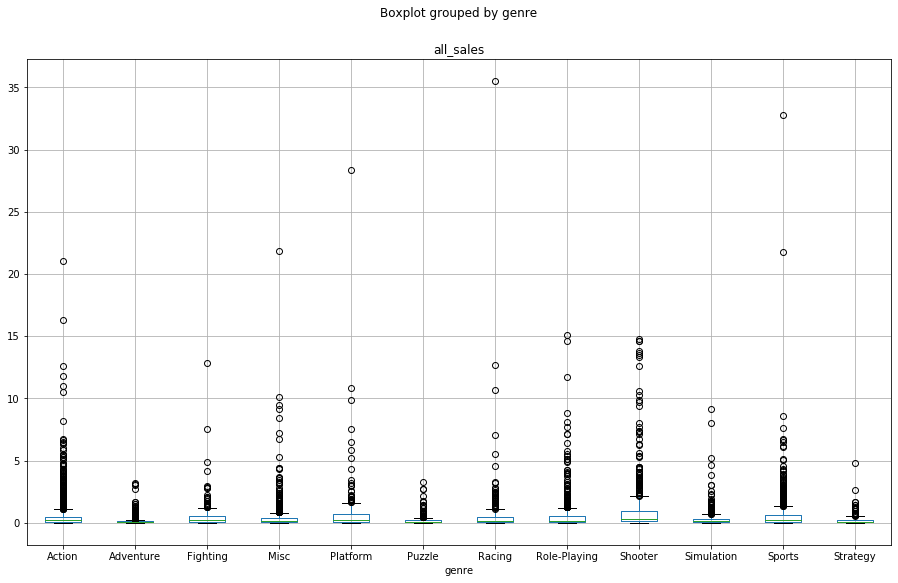

In [44]:
actual_games.boxplot('all_sales', by='genre', figsize=(15,9))

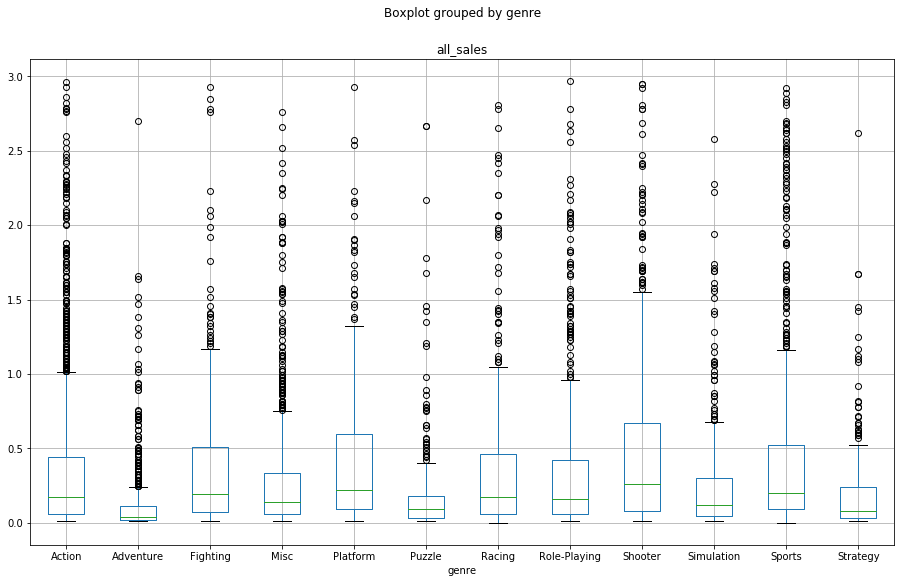

In [45]:
# посмотрим подробнее на средние, поэтому возьмем участок до 3
actual_games.query('all_sales < 3').boxplot('all_sales', by='genre', figsize=(15,9))

По жарнам продажи различные -   
**Самые низкие по продажам**: приключения, паззлы, стратегии и платформеры (что бы это ни значило)  
**Самые высокие по продажам**: стрелялки, спортивные, экшен, гонки

<a name="step3_conclusion"></a>
### Вывод

1. Выпуск игр в разные годы
   - Наблюдаются пики в 2008-2009 годах и в 2016. В первом случае, мог повлиять на такую популярность кризис - многие решили справляться со стрессом играя в приставки + разработчики уже нащупали, что нравится пользователям и чего они хотят.  
   - Увеличение продаж в 2016 году можно объяснить наращиваем технологической составляющей - качесвто графики и возмодностей игр возросло.  
   
2. Изменения продаж по платформам
   - PC игры вечны всегда - персональный компьютер не только для игр, поэтому им пользуются вечно. Вот и игры выпускают для него с 1992 года по текущий в выборке 2016 год.
   - Для остальных игр наблюдается тенденция в 2004 выпустили в 2013 закончили выпускать, в 2000 выпустили в 2010 закончили. По **10 лет держится платформа**, затем появялется новая популярная.
   - А вот PS4 вышла в 2013 году, поэтому игры на нее еще будут выпускать. При этом, PS3 накладывается на PS4 (потому что у одних еще остается старая приставка, а для продвинутых тоже надо игры делать). То же сейчас наблюдается и с PS5 - скоро ее выпустят, и продажи будут нахлестываться на продажи игр для PS4.
   - Для GB (GameBoy) наблюдается самая продолжительная популярность, причем скачкообразная, с 1988 по 2001 год. Может быть новое - это хорошо забытое старое?  
   
3. Отобраны данные по 20 лучшим в продажах платформам и с 2008 года (так как наблюдался рост в эти годы, а топ-20 захватил популярные и зарождающиеся платформы)

4. Потенциально прибыльные платформы
   - Растут по продажам - PS4  
   - Не растут и не падают - 3DS, XOne, PC  
   - Падают по продажам - PS3, DS, Wii, X360, WiiU  
   - Давно упали - PS2, PSP  

   1. РС - пользуется до сих пор популярностью - это безотказный вариант, но продаж там будет не больше всех. Можно эту платформу оставить как задел на будущее.  
   2. Самая востребованная сейчас на рынке - PS4. Также ресурсы позволяют сделать игру и для PS3. Еще безотказный вариант -  для 3DS, XOne - в среднем могут принести неплохой доход.  
   
5. Глобальные продажи игр на каждой платформе
   - Разница есть между платформами и существенная - и по средним и по максимальным .  
   - Распределения сдвинуты в положительную сторону - это хорошо для нас - с бОльшей вероятностью продажи будут выше среднего чем ниже.  
   - Wii - платформа, которая пользовалась самой большой популярностью. Потом вышла новая WiiU, которая была всем знакома по своему родителю. Поэтому она (WiiU) имеет распределение выше, чем у Wii. Но по гистограмме видно, что они и сдулись достаточно быстро, и игры на них не имени максимумов выше, чем у Wii.  
   
6. Влияние на продажи внутри одной платформы отзывов критиков и пользователей
   - Высокая оценка критика или пользователя не гарантирует больших прибылей - вы можете быть внизу графика и также вверху. Но низкая оценка критика или пользователей - говорит о том, что будут и низкие продажи. 
   - Также для оценок критиков боле 90 баллов - продажи больше 1 млн дол точно обеспечены! (Скорее всего, большинство игроков при выборе игры руководствуются оценкой критика больше 90 (также как и на букинге путешественники выбирают отели в высоким рейтингом). 
   - Оценка критика больше влияет, чем оценка пользователя на покупку
   - У платформы WiiU имеют большее влияние оценки пользователей, а не критиков.  
    
7. Распределение игр по жанрам
   - **Самые низкие по продажам**: приключения, паззлы, стратегии и платформеры (что бы это ни значило)  
   - **Самые высокие по продажам**: стрелялки, спортивные, экшен, гонки

<a name="step4"></a>
### Шаг 4. Портрет каждого региона

Определим для пользователя каждого региона (NA, EU, JP):  
- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5) 
- Влияние рейтинга ESRB на продажи в отдельном регионе

<a name="step4_NA"></a>
**Северная Америка**

- Самые популярные платформы (топ-5)

In [79]:
top5_platform_na = actual_games.pivot_table(index='platform',
                      values='na_sales', 
                      aggfunc='sum').sort_values('na_sales', ascending=False)[:5]
top5_platform_na

,na_sales
platform,
X360,493.79
PS3,351.04
Wii,336.71
DS,199.95
PS4,108.74


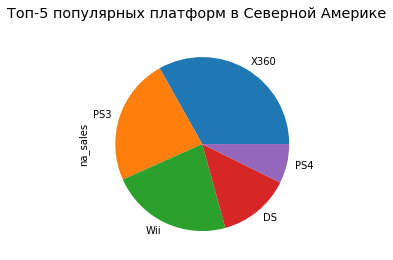

In [80]:
plt.suptitle('Топ-5 популярных платформ в Северной Америке', ha='center', fontsize='x-large')
top5_platform_na['na_sales'].plot(kind='pie')

Самые популярные в Америке - PS3, XBox360, Wii, DC, PS4.
Совпадают результаты по Америки со средними по всем странам.

- Самые популярные жанры (топ-5) 

In [74]:
top5_genre_na = actual_games.pivot_table(index='genre',
                      values='na_sales', 
                      aggfunc='sum').sort_values('na_sales', ascending=False)[:5]
top5_genre_na

,na_sales
genre,
Action,436.24
Shooter,310.51
Sports,276.85
Misc,211.42
Role-Playing,153.68


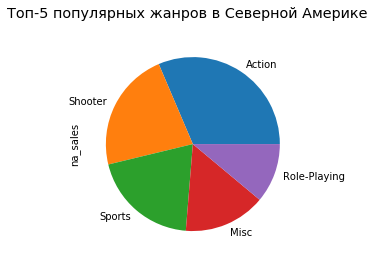

In [77]:
plt.suptitle('Топ-5 популярных жанров в Северной Америке', ha='center', fontsize='x-large')
top5_genre_na['na_sales'].plot(kind='pie')

Экшн игры и шутеры - любимчики Америки, что неудивительно, ведь Америка - энергичная страна предпринимателей.

- Влияет ли рейтинг ESRB на продажи

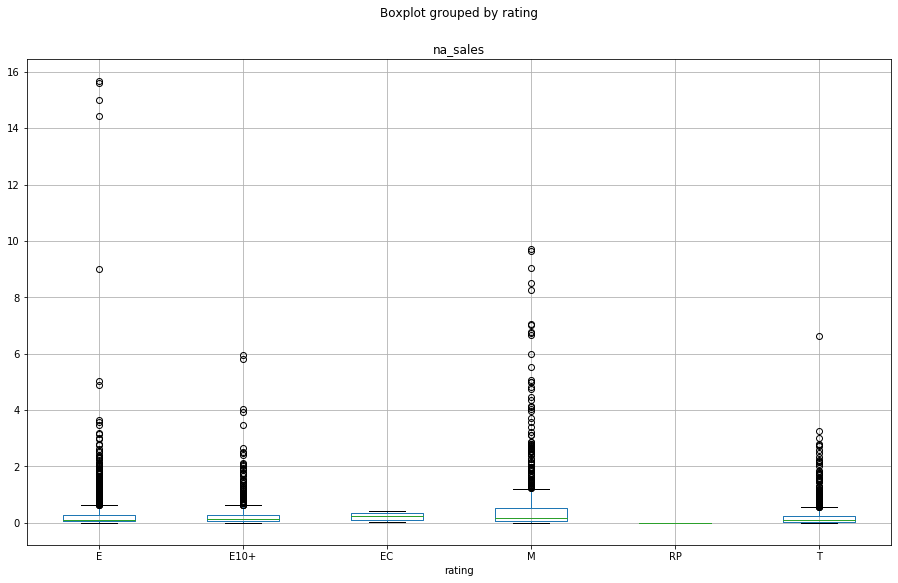

In [48]:
actual_games.boxplot('na_sales', by='rating', figsize=(15,9))

In [49]:
actual_games.query('na_sales > 0').groupby('rating')['na_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
E,1648.0,0.325771,0.890152,0.01,0.060,0.13,0.30,15.68
E10+,899.0,0.283315,0.480929,0.01,0.070,0.14,0.31,5.95
EC,6.0,0.220000,0.155949,0.04,0.085,0.23,0.33,0.42
M,821.0,0.610061,1.160490,0.01,0.080,0.21,0.59,9.70
T,1132.0,0.267562,0.427916,0.01,0.070,0.13,0.29,6.62


В Америке:
- очень тщательно относятся к рейтингу - ЕС(для детей) берут, но не так много. Потому что родителя не часто хотят, чтобы дети играли.
- рейтинг M (для взрослых 17+) пользуется самой обльшой популярностью.

<a name="step4_EU"></a>
**Европа**

- Самые популярные платформы (топ-5)

In [58]:
top5_platform_eu = actual_games.pivot_table(index='platform',
                      values='eu_sales', 
                      aggfunc='sum').sort_values('eu_sales', ascending=False)[:5]
top5_platform_eu

,eu_sales
platform,
PS3,295.67
X360,236.69
Wii,171.89
PS4,141.09
PC,94.02


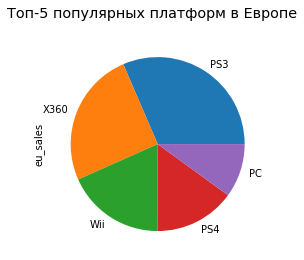

In [73]:
plt.suptitle('Топ-5 популярных платформ в Европе', ha='center', fontsize='x-large')
top5_platform_eu['eu_sales'].plot(kind='pie')

Самые популярные в Европе - PS3, XBox360, Wii, PS4, PC. (По ощущениям, как и в России)
От Америки отличает замена DS на PC

- Самые популярные жанры (топ-5)

In [81]:
top5_genre_eu = actual_games.pivot_table(index='genre',
                      values='eu_sales', 
                      aggfunc='sum').sort_values('eu_sales', ascending=False)[:5]
top5_genre_eu

,eu_sales
genre,
Action,310.58
Shooter,207.89
Sports,184.70
Misc,106.12
Role-Playing,93.18


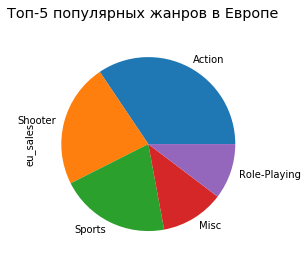

In [82]:
plt.suptitle('Топ-5 популярных жанров в Европе', ha='center', fontsize='x-large')
top5_genre_eu['eu_sales'].plot(kind='pie')

В Европе очень интересно, что не только совпадают типы жанров, но и их ранжирование с Америкой

- Влияет ли рейтинг ESRB на продажи

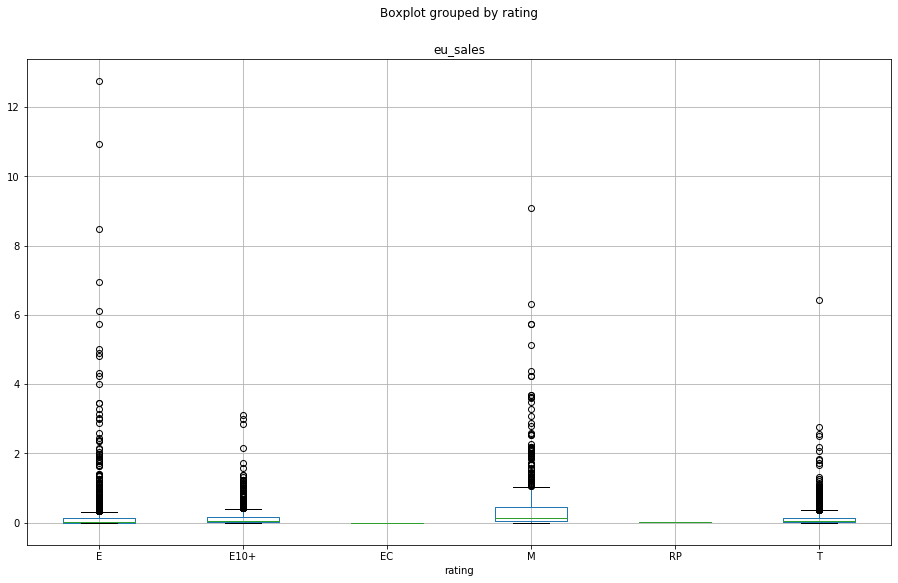

In [52]:
actual_games.boxplot('eu_sales', by='rating', figsize=(15,9))

In [53]:
actual_games.query('eu_sales > 0').groupby('rating')['eu_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
E,1111.0,0.291971,0.820093,0.01,0.030,0.09,0.2500,12.76
E10+,727.0,0.199271,0.313751,0.01,0.030,0.10,0.2250,3.11
M,855.0,0.424047,0.766635,0.01,0.060,0.16,0.4500,9.09
RP,2.0,0.020000,0.014142,0.01,0.015,0.02,0.0250,0.03
T,1022.0,0.182456,0.340373,0.01,0.030,0.08,0.2175,6.42


Рейтинг влияет на продажи в Европе:
- для детей раннего возраста (EC) и рейтинг ожидается (RP) - слишком мало данных, чтобы судить о распределении
- Продаж больше всего (по сумме) идет в рейтинге M (для взрослых 17+) (примерно в этом возрасте появляются карманные деньги и возможность самому выбрать и купить игру, а также азарт.

<a name="step4_JP"></a>
**Япония**

- Самые популярные платформы (топ-5)

In [85]:
top5_platform_jp = actual_games.pivot_table(index='platform',
                      values='jp_sales', 
                      aggfunc='sum').sort_values('jp_sales', ascending=False)[:5]
top5_platform_jp

,jp_sales
platform,
3DS,100.65
DS,76.12
PS3,74.80
PSP,61.03
Wii,47.88


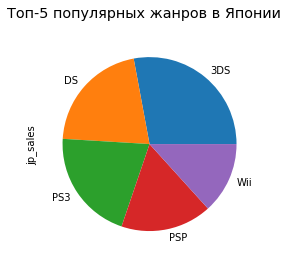

In [86]:
plt.suptitle('Топ-5 популярных жанров в Японии', ha='center', fontsize='x-large')
top5_platform_jp['jp_sales'].plot(kind='pie')

А вот в Японии обожают 3DS, DS и PSP - типичные компактные приставки, да и в лидерах Японские разработки Nintendo (свои себе же хорошо делают).  
А вот PS4 еще не укоренилась на рынке Японии (видимо, еще не всем приехала)

- Самые популярные жанры (топ-5)

In [83]:
top5_genre_jp = actual_games.pivot_table(index='genre',
                      values='jp_sales', 
                      aggfunc='sum').sort_values('jp_sales', ascending=False)[:5]
top5_genre_jp

,jp_sales
genre,
Role-Playing,130.41
Action,84.07
Misc,36.03
Sports,29.90
Platform,22.95


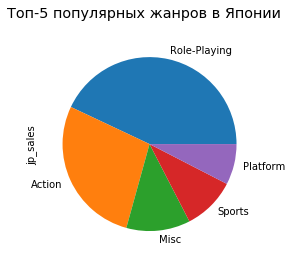

In [84]:
plt.suptitle('Топ-5 популярных жанров в Японии', ha='center', fontsize='x-large')
top5_genre_jp['jp_sales'].plot(kind='pie')

Япония различается не только по платформам, но и по жанрам игр: самые популярые здесь - ролевые, экшн, misc.  

Япония - страна одиночек (у них есть даже кафе для одиночек с мягкими игрушками и много таких тематических мест), поэтому ролевые игры у них популярны.

- Влияет ли рейтинг ESRB на продажи

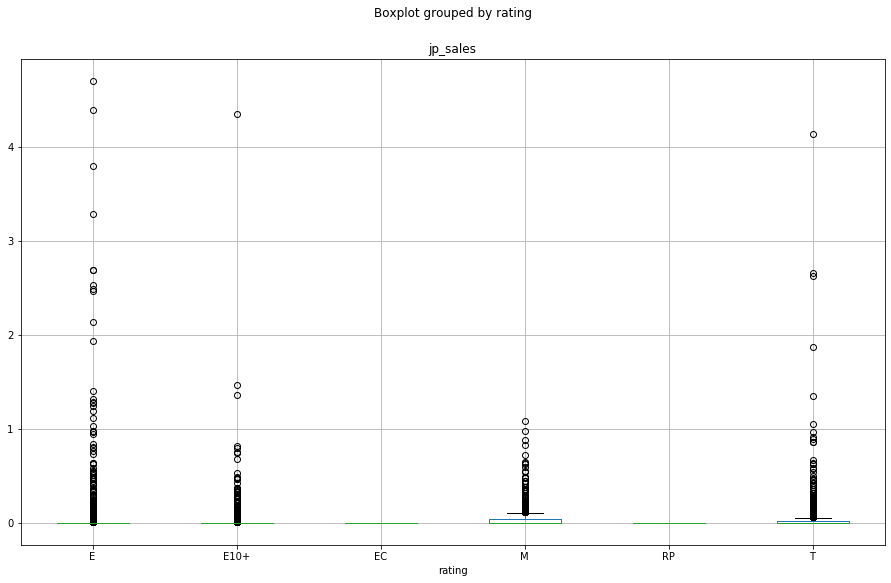

In [56]:
actual_games.boxplot('jp_sales', by='rating', figsize=(15,9))

In [57]:
actual_games.query('jp_sales > 0').groupby('rating')['jp_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
E,255.0,0.300980,0.661412,0.01,0.02,0.06,0.230,4.70
E10+,159.0,0.159308,0.400452,0.01,0.02,0.04,0.155,4.35
M,405.0,0.093877,0.143475,0.01,0.02,0.04,0.100,1.08
T,448.0,0.130737,0.310497,0.01,0.02,0.06,0.130,4.13


В Японии предпочитают брать игры рейтинга для всех (E). В Японии нет цензуры - детям не запрещают ничего, потому что считают, что запретный плод сладок, поэтому такая популярность игр для всех. Или же взрослые люди-одиночки любят расслабиться с помощью видеоигр.

<a name="step4_conclusion"></a>
### Вывод

**Платформы**
1. Для Европы и Америки схожий вариант топ-5 платформ (PS3, XBox360, Wii, PS4), но для Европы популярнее - PC, а для Америки - DS.  
2. Для Японии популярны компактные и японские платформы - 3DS, DS, PS3, PSP, Wii. PS4 - еще не обосновался в Японии, скорее всего, не доехал еще ко всем.  

**Жанры**
1. Для Европы и Америки они совпадают и по качеству и по рангу - Action, Shooter, Sports, Misc, Role-Playing.  
2. Для Японии отличные жанры идут - Role-Playing, Action, Misc, Sports, Platform (бродилки). Японцы больше любят процесс и страдают одиночеством, поэтому набор жанров таков.   

**Рейтинг ESRB**
1. В Америке:
   - очень тщательно относятся к рейтингу - ЕС(для детей) берут, но не так много. Потому что родителя не часто хотят, чтобы дети играли.
   - рейтинг M (для взрослых 17+) пользуется самой большой популярностью.
  
2. Рейтинг влияет на продажи в Европе:
   - для детей раннего возраста (EC) и рейтинг ожидается (RP) - слишком мало данных, чтобы судить о распределении
   - Продаж больше всего (по сумме) идет в рейтинге M (для взрослых 17+) (примерно в этом возрасте появляются карманные деньги и возможность самому выбрать и купить игру, а также азарт.  
  
3. В Японии предпочитают брать игры рейтинга для всех (E). В Японии нет цензуры - детям не запрещают ничего, потому что считают, что запретный плод сладок, поэтому такая популярность игр для всех. Или же взрослые люди-одиночки любят расслабиться с помощью видеоигр.

<a name="step5"></a>
### Шаг 5. Проверка гипотез

<a name="step5.1"></a>
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
$H_0$: Средние выручки пользовательские рейтинги платформ Xbox One и PC одинаковы.  
$H_1$: Средние выручки пользовательские рейтинги платформ Xbox One и PC различаются.

In [89]:
alpha = .05 # примем alpha 0.05 
# (потому что данные по играм достаточно полные (большой промежуток времени захвачен) и чистые)

XOne_games = actual_games.query('platform == "XOne" and user_score.notnull()')
PC_games = actual_games.query('platform == "PC" and user_score.notnull()')

# гипотеза о сравнении среднии 2 независимых генеральных совокупностей
results = st.ttest_ind( 
    XOne_games['user_score'],
    PC_games['user_score'])

XOne_mean = XOne_games['user_score'].mean()
PC_mean = PC_games['user_score'].mean()

print('p-значение: {:.2f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Не можем отвергнуть нулевую гипотезу: средние равны')
elif XOne_mean < PC_mean:
    print('Отвергаем нулевую гипотезу: средний пользовательский рейтинг PC больше')
else:
    print('Отвергаем нулевую гипотезу: средний пользовательский рейтинг XBox One больше')

p-значение: 0.12
Отвергаем нулевую гипотезу: средний пользовательский рейтинг PC больше


<a name="step5.2"></a>
2. Средние пользовательские рейтинги жанров Action и Sports разные  
$H_0$: Средние пользовательские рейтинги жанров Action и Sports одинаковы.  
$H_1$: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [90]:
alpha = .05 # примем alpha 0.05 
# (потому что данные по играм достаточно полные (большой промежуток времени захвачен) и чистые)

Action_games = actual_games.query('genre == "Action" and user_score.notnull()')
Sports_games = actual_games.query('genre == "Sports" and user_score.notnull()')

# гипотеза о сравнении среднии 2 независимых генеральных совокупностей
results = st.ttest_ind( 
    Action_games['user_score'],
    Sports_games['user_score'])

Action_mean = Action_games['user_score'].mean()
Sports_mean = Sports_games['user_score'].mean()

print('p-значение: {:.2f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Не можем отвергнуть нулевую гипотезу: средние равны')
elif Action_mean < Sports_mean:
    print('Отвергаем нулевую гипотезу: средний пользовательский рейтинг PC больше')
else:
    print('Отвергаем нулевую гипотезу: средний пользовательский рейтинг XBox One больше')

p-значение: 0.00
Не можем отвергнуть нулевую гипотезу: средние равны


<a name="step5_conclusion"></a>
### Вывод

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - неверно
   - Выяснилось, что в 12% случаев совпадение будет случайным (что выше доверительного интервала 5%, поэтому отвергаем нулевую гипотезу
   - Средний пользовательский рейтинг игр на PC выше, чем на XBox One
   
2. Средние пользовательские рейтинги жанров Action и Sports разные - неверно
   - В 0% случаев совпадение будет случайным (то есть в 100% оно не случайно!) - поэтому средние пользовательские рейтинги Экшн-игр и спортивных равны

<a name="step6"></a>
### Шаг 6. Общий вывод

[Шаг 1](#step1)  
**Типы данных**  
Неверные типы данных только у Year_of_Release, Critic_Score и User_Score:

**Пропуски в данных**  
- Name, Genre - скорее ошибка системы (всего 2 пропуска среди 16715 игр, поэтому может избавиться от них)
- Year_of_Release - может быть насколько стара, что никто и не помнит когда она вышла (надо точно посмотреть по названиям)
- Critic_Score, User_Score, Rating - не во все играли, не все оценили (но заполнять пропуски придется) 
- NA_sales, EU_sales, JP_sales, Other_sales - есть нулевые значения
- User_Score содержит пропуски данных в виде сюрприза, а именно, строки 'tbd' (To Be Determined)

[Шаг 2](#step2)
1. **Названия столбцов** приведены к нижнему регистру
2. Заполнены некоторые из **пропусков**:
   - name, genre - скорее ошибка системы (всего 2 пропуска среди 16715). Восстановить невозможно, поэтому мы избавились от них
   - year_of_release - если год стоял в названии, то взяла оттуда, остальное - спарсила данные из интернета. Итого: 269 пропусков -> 91 пропуск
   - critic_score, user_score - есть зависимоть от жанра и платформы игры, поэтому заполнила медианными значениями по соответствующим факторам
   - rating (ESRB) - пустое значение значит, что разработчики решили выпускать игру без рейтинга. Поэтому пропуски не заполняла, чтобы в дальнейшем понять, какие игры и в каких регионах хоят рейтинговать и не хотят.
   - na_sales, eu_sales, jp_sales, other_sales - есть нулевые значения. Оставим их такими, так как, скорее всего, игры не продавали в данном регионе. Их могли попробовать продать в Америке, но потом продажи провалились, и их не повезли в другие страны из-за этого.  
3. **Преобразование типов**:
   - user_score (object -> float)  
   Остальное осталось без преобразования, так как пустые значения все еще присутствовали в столбцах  
4. Подсчитаны **суммарные продажи** в регионах (Америка + Европа + Япония + остальные)

[Шаг 3](#step3)
1. Выпуск игр в разные годы
   - Наблюдаются пики в 2008-2009 годах и в 2016. В первом случае, мог повлиять на такую популярность кризис - многие решили справляться со стрессом играя в приставки + разработчики уже нащупали, что нравится пользователям и чего они хотят.  
   - Увеличение продаж в 2016 году можно объяснить наращиваем технологической составляющей - качесвто графики и возмодностей игр возросло.  
   
2. Изменения продаж по платформам
   - PC игры вечны всегда - персональный компьютер не только для игр, поэтому им пользуются вечно. Вот и игры выпускают для него с 1992 года по текущий в выборке 2016 год.
   - Платформа пользуется популярностью около 10 лет.
   - А вот PS4 вышла в 2013 году, поэтому игры на нее еще будут выпускать. При этом, PS3 накладывается на PS4 (потому что у одних еще остается старая приставка, а для продвинутых тоже надо игры делать). То же сейчас наблюдается и с PS5 - скоро ее выпустят, и продажи будут нахлестываться на продажи игр для PS4.
   - Для GB (GameBoy) наблюдается самая продолжительная популярность, причем скачкообразная, с 1988 по 2001 год. Может быть новое - это хорошо забытое старое?  
   
3. Отобраны данные по 20 лучшим в продажах платформам и с 2008 года (так как наблюдался рост в эти годы, а топ-20 захватил популярные и зарождающиеся платформы)

4. Потенциально прибыльные платформы
   - Растут по продажам - PS4  
   - Не растут и не падают - 3DS, XOne, PC  
   - Падают по продажам - PS3, DS, Wii, X360, WiiU  
   - Давно упали - PS2, PSP  

   1. РС - пользуется до сих пор популярностью - это безотказный вариант, но продаж там будет не больше всех. Можно эту платформу оставить как задел на будущее.  
   2. Самая востребованная сейчас на рынке - PS4. Также ресурсы позволяют сделать игру и для PS3. Еще безотказный вариант -  для 3DS, XOne - в среднем могут принести неплохой доход.  
   
5. Глобальные продажи игр на каждой платформе
   - Разница есть между платформами и существенная - и по средним и по максимальным .  
   - Распределения сдвинуты в положительную сторону - это хорошо для нас - с бОльшей вероятностью продажи будут выше среднего чем ниже.  
   - Wii - платформа, которая пользовалась самой большой популярностью. Потом вышла новая WiiU, которая была всем знакома по своему родителю. Поэтому она (WiiU) имеет распределение выше, чем у Wii. Но по гистограмме видно, что они и сдулись достаточно быстро, и игры на них не имени максимумов выше, чем у Wii.  
   
6. Влияние на продажи внутри одной платформы отзывов критиков и пользователей
   - Высокая оценка критика или пользователя не гарантирует больших прибылей - вы можете быть внизу графика и также вверху. Но низкая оценка критика или пользователей - говорит о том, что будут и низкие продажи. 
   - Также для оценок критиков боле 90 баллов - продажи больше 1 млн дол точно обеспечены! (Скорее всего, большинство игроков при выборе игры руководствуются оценкой критика больше 90 (также как и на букинге путешественники выбирают отели в высоким рейтингом). 
   - Оценка критика больше влияет, чем оценка пользователя на покупку
   - У платформы WiiU имеют большее влияние оценки пользователей, а не критиков.  
    
7. Распределение игр по жанрам
   - **Самые низкие по продажам**: приключения, паззлы, стратегии и платформеры (что бы это ни значило)  
   - **Самые высокие по продажам**: стрелялки, спортивные, экшн, гонки
   
[Шаг 4](#step4)  
**Платформы**
1. Для Европы и Америки схожий вариант топ-5 платформ (PS3, XBox360, Wii, PS4), но для Европы популярнее - PC, а для Америки - DS.  
2. Для Японии популярны компактные и японские платформы - 3DS, DS, PS3, PSP, Wii. PS4 - еще не обосновался в Японии, скорее всего, не доехал еще ко всем.  

**Жанры**
1. Для Европы и Америки они совпадают и по качеству и по рангу - Action, Shooter, Sports, Misc, Role-Playing.  
2. Для Японии отличные жанры идут - Role-Playing, Action, Misc, Sports, Platform (бродилки). Японцы больше любят процесс и страдают одиночесвтом, поэтому набор жанров таков.   

**Рейтинг ESRB**
1. В Америке:
   - очень тщательно относятся к рейтингу - ЕС(для детей) берут, но не так много. Потому что родителя не часто хотят, чтобы дети играли.
   - рейтинг M (для взрослых 17+) пользуется самой обльшой популярностью.
  
2. Рейтинг влияет на продажи в Европе:
   - для детей раннего возраста (EC) и рейтинг ожидается (RP) - слишком мало данных, чтобы судить о распределении
   - Продаж больше всего (по сумме) идет в рейтинге M (для взрослых 17+) (примерно в этом возрасте появляются карманные деньги и возможность самому выбрать и купить игру, а также азарт.  
  
3. В Японии предпочитают брать игры рейтинга для всех (E). В Японии нет цензуры - детям не запрещают ничего, потому что считают, что запретный плод сладок, поэтому такая популярность игр для всех. Или же взрослые люди-одиночки любят расслабиться с помощью видеоигр.  
   
[Шаг 5](#step5)  
1. Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые
   - Выяснилось, что в 12% случаев совпадение будет случайным (что выше доверительного интервала 5%, поэтому отвергаем нулевую гипотезу
   - Средний пользовательский рейтинг игр на PC выше, чем на XBox One
   
2. Средние пользовательские рейтинги жанров Action и Sports равные
   - В 0% случаев совпадение будет случайным (то есть в 100% оно не слуйчано!) - поэтому средние пользовательские рейтинги Экшн-игр и спортивных равны
   
---
### Итого  

Супер-пупер игру нужно делать такой (или закупать такие игры):  
  
**Платформа**: PS4 (будет хорошо для Америки, Европы и в будущем для Японии) 
   - альтернативы - 3DS, PС, PS3, XBox One (в порядке приоритета)
   
**Жанр**: Экшн или спортивные (их предпочитают по всему миру и они зарабатывают в среднем одинаковые пользовательские рейтинги) 
   - для Европы и Америки подойдут еще и стрелялки (шутеры)
   - для Японии понравится игра жанра Role-Playing
   
**Рейтинг ESRB**: Популярен везде рейтинг M (17+) 
   - для Японии востребован еще E (для всех возрастов)
   
**Оценка критиков**: Оценки выше 90 гарантируют нам продажи более 1 млн дол (в среднем, естественно)  
  
И вообще продажа видеоигр - прибыльное дело, в прошлом 2016 году суммарные продвжи игр были новым пиком в этой индустрии.